In [4]:
#4.2.1 2乗和誤差
import numpy as np
def mean_squared_error(y ,t):
    return 0.5 * np.sum((y-t)**2)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #2の可能性が一番高い
print (mean_squared_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #7の可能性が一番高い
print (mean_squared_error(np.array(y), np.array(t))) #2の方が損失関数が小さい

0.0975
0.5975


In [6]:
#4.2.2 交差エントロピー誤差
import numpy as np
def cross_entropy_error(y ,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #2の可能性が一番高い
print (cross_entropy_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] #7の可能性が一番高い
print (cross_entropy_error(np.array(y), np.array(t))) #2の方が損失関数が小さい

0.510825457099
2.30258409299


In [10]:
#4.2.3 ミニバッチ学習
import sys, os
sys.path.append(os.pardir)
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

print (x_train.shape)
print (t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print (batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
#print (x_batch)
print (t_batch)

(60000, 784)
(60000, 10)
[58967 21047 18207 37958 15337 11942  7017 47274 43353 53057]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]


In [ ]:
#4.2.4 交差エントロピー誤差
import numpy as np
def cross_entropy_error(y ,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size
    #return -np.sum(t * np.log(y[np.arrange(batch_size),t])) / batch_size #tがlabel表現の場合y[0,2]

Populating the interactive namespace from numpy and matplotlib
0.1999999999990898
0.2999999999986347


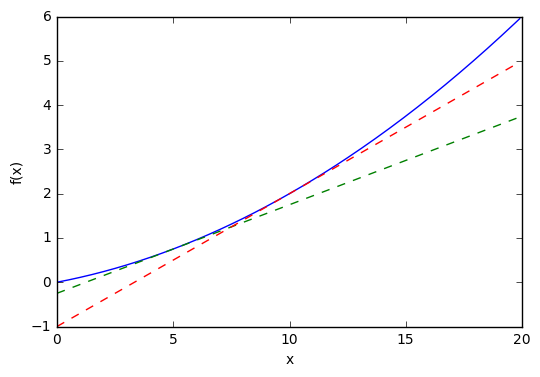

In [29]:
#4.3.2
import numpy as np
import matplotlib.pyplot as plt
%pylab inline --no-import-all

def function_1(x):
    return 0.01*x**2 + 0.1*x
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)
print (numerical_diff(function_1, 5))
print (numerical_diff(function_1, 10))

def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y
tf_5 = tangent_line(function_1, 5)
y_5 = tf_5(x)
plt.plot(x, y_5,"--")
tf_10 = tangent_line(function_1, 10)
y_10 = tf_10(x)
plt.plot(x, y_10,"--")

Populating the interactive namespace from numpy and matplotlib


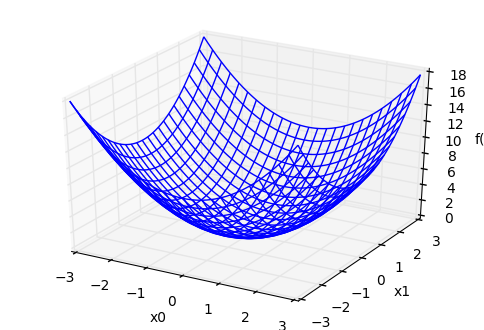

In [59]:
#4.3.3
import numpy as np
import matplotlib.pyplot as plt
%pylab inline --no-import-all
import mpl_toolkits.mplot3d.axes3d as axes3d

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x0 = np.arange(-3, 3, 0.025)
x1 = np.arange(-3, 3, 0.025)
X, Y = np.meshgrid(x0, x1)
Z = X**2 + Y**2

ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

In [50]:
#4-4 勾配
import numpy as np

def function_2(x):
    #return x[0]**2 + x[1]**2
    return np.sum(x**2)

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

print (numerical_gradient(function_2, np.array([3.0, 4.0])))
print (numerical_gradient(function_2, np.array([0.0, 2.0])))
print (numerical_gradient(function_2, np.array([3.0, 0.0])))


[ 6.  8.]
[ 0.  4.]
[ 6.  0.]


/Users/masacy/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


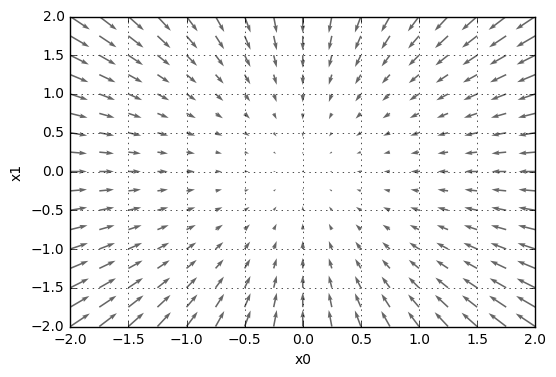

In [58]:
#4-4 ch04/gradient_2d.py
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()

In [72]:
#4.4.1 勾配法
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x
init_x = np.array([-3.0, 4.0])
#print (gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))
#print (gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))
print (gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.99999994  3.99999992]


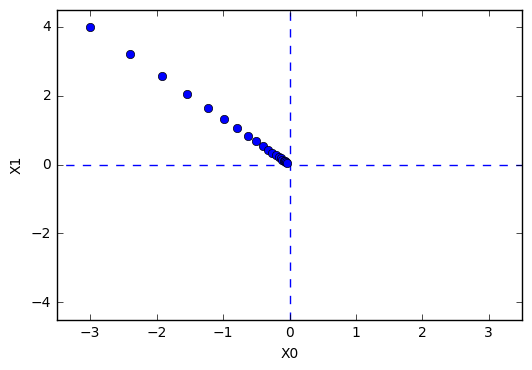

In [65]:
#4.4.1 ch04/gradient_method.py
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [79]:
# ch4/gradient_simplenet.py
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

net = simpleNet()  
print (net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print (p)
print (np.argmax(p))

t = np.array([0, 0, 1])
print (net.loss(x, t))

def f(W):
    return net.loss(x, t)
#f = lambda w: net.loss(x, t) #無名関数

dW = numerical_gradient(f, net.W)
print(dW)


[[ 1.49852179 -0.2307713   1.59599832]
 [ 0.18031567  1.28948566 -1.87492812]]
[ 1.06139718  1.02207432 -0.72983631]
0
2.5465075042
[[ 0.28192911  0.27105799 -0.55298709]
 [ 0.42289366  0.40658698 -0.82948064]]


In [93]:
#4.5.1 ch04/two_layer_net.py
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print (net.params['W1'].shape)
print (net.params['b1'].shape)
print (net.params['W2'].shape)
print (net.params['b2'].shape)

x = np.random.rand(100, 784)
y = net.predict(x)
t = np.random.rand(100, 10)
#grads = net.numerical_gradient(x, t) #時間かかる
grads = net.gradient(x, t) #高速化
print (grads['W1'].shape)
print (grads['b1'].shape)
print (grads['W2'].shape)
print (grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)
(784, 100)
(100,)
(100, 10)
(10,)


train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.782, 0.7857
train acc, test acc | 0.8719, 0.8745
train acc, test acc | 0.895833333333, 0.8995
train acc, test acc | 0.90635, 0.9091
train acc, test acc | 0.91325, 0.9179
train acc, test acc | 0.91905, 0.9208
train acc, test acc | 0.923133333333, 0.9253
train acc, test acc | 0.926866666667, 0.9295
train acc, test acc | 0.9299, 0.9336
train acc, test acc | 0.933316666667, 0.9354
train acc, test acc | 0.9365, 0.9382
train acc, test acc | 0.938533333333, 0.9396
train acc, test acc | 0.940683333333, 0.9398
train acc, test acc | 0.94325, 0.9424
train acc, test acc | 0.944566666667, 0.9445
train acc, test acc | 0.9462, 0.9458


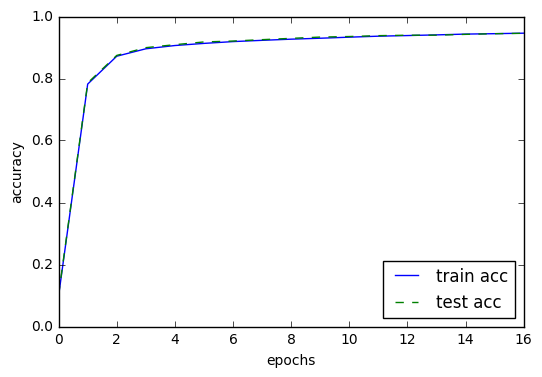

In [94]:
#4.5.2 ch04/train_neuralnet.py
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()